In [1]:
%matplotlib inline
from importlib import reload
import LinVarMap

### T cell data

In [17]:
X = LinVarMap.X_from_excel('./Tcells/Tcell-Area-Gen1to8.xlsx',gmax=4)
Xpatt = LinVarMap.make_cov_pattern(X.columns)

mvn = LinVarMap.MVN(em_tol=1e-2, em_maxIter=5000, em_verbose=True)
mvn.fit(X, pattern=Xpatt, MLEalgo='ortho_select',Morder=1)

Iter 0   NLL: 895.031   Change: -inf
Iter 1   NLL: 749.619   Change: -145.412
Iter 2   NLL: 703.301   Change: -46.318
Iter 3   NLL: 679.920   Change: -23.381
Iter 4   NLL: 669.134   Change: -10.785
Iter 5   NLL: 664.819   Change: -4.315
Iter 6   NLL: 663.159   Change: -1.660
Iter 7   NLL: 662.516   Change: -0.643
Iter 8   NLL: 662.264   Change: -0.253
Iter 9   NLL: 662.163   Change: -0.101
Iter 10   NLL: 662.122   Change: -0.041
Iter 11   NLL: 662.105   Change: -0.017
Iter 12   NLL: 662.098   Change: -0.007


### Simulated data

In [18]:
sim = LinVarMap.simData()
sim.makeX(n_gens=4, n_samples=20, prob=0.8, missing=0.2, seed=1)
Xsim = sim.X.copy()
pXsim = sim.cov_pattern.copy()
cov_true = sim.cov_true.copy()

mvn = LinVarMap.MVN(em_tol=1e-3, em_maxIter=10000, em_verbose=True)
mvn.fit(Xsim,pattern=pXsim,MLEalgo='ortho_select',Morder=1)

Iter 0   NLL: 154.310   Change: -inf
Iter 1   NLL: 60.573   Change: -93.737
Iter 2   NLL: 15.640   Change: -44.933
Iter 3   NLL: -0.816   Change: -16.456
Iter 4   NLL: -6.390   Change: -5.574
Iter 5   NLL: -8.390   Change: -2.000
Iter 6   NLL: -9.202   Change: -0.812
Iter 7   NLL: -9.578   Change: -0.376
Iter 8   NLL: -9.773   Change: -0.195
Iter 9   NLL: -9.883   Change: -0.111
Iter 10   NLL: -9.950   Change: -0.067
Iter 11   NLL: -9.993   Change: -0.042
Iter 12   NLL: -10.020   Change: -0.028
Iter 13   NLL: -10.039   Change: -0.018
Iter 14   NLL: -10.051   Change: -0.013
Iter 15   NLL: -10.060   Change: -0.009
Iter 16   NLL: -10.066   Change: -0.006
Iter 17   NLL: -10.070   Change: -0.004
Iter 18   NLL: -10.073   Change: -0.003
Iter 19   NLL: -10.075   Change: -0.002
Iter 20   NLL: -10.076   Change: -0.001
Iter 21   NLL: -10.077   Change: -0.001


### Worm data

In [19]:
worm = LinVarMap.wormData() #Create wormData object
worm.load_worm_data(imarker=1) #load (unbalanced) data from txt files
worm.balance_pedigree(gmax=8)
mvn = LinVarMap.MVN(em_tol=1e-3, em_maxIter=10000, em_verbose=True) 
# Fit mvn to worm data
mvn.fit(worm.X, pattern=worm.cov_pattern, MLEalgo='ortho_select',Morder=1)

Number of files loaded =  10
These cells were not assigned a binary variable:
['MSpppaaaa', 'MSpppaaap']
Cell positions with nans:  [  0   1 304 305 306 307 308 309 310 311 440 441 448 449 450 451 456 457
 458 459 460 461 464 465 470 471 472 473 474 475 476 477 478 479 480 481
 490 491 754 755 756 757 758 759 760 761 762 763 764 765 766 767]
Iter 0   NLL: 9252.427   Change: -inf
Iter 1   NLL: 1755.415   Change: -7497.012
Iter 2   NLL: 1700.284   Change: -55.131
Iter 3   NLL: 1696.721   Change: -3.563
Iter 4   NLL: 1696.094   Change: -0.627
Iter 5   NLL: 1695.832   Change: -0.262
Iter 6   NLL: 1695.691   Change: -0.141
Iter 7   NLL: 1695.610   Change: -0.081
Iter 8   NLL: 1695.563   Change: -0.047
Iter 9   NLL: 1695.536   Change: -0.027
Iter 10   NLL: 1695.520   Change: -0.016
Iter 11   NLL: 1695.511   Change: -0.009
Iter 12   NLL: 1695.506   Change: -0.005
Iter 13   NLL: 1695.503   Change: -0.003
Iter 14   NLL: 1695.501   Change: -0.002
Iter 15   NLL: 1695.500   Change: -0.001
Iter 16 

### Visualize results

In [10]:
#mvn.graphplot(data='pcorr')

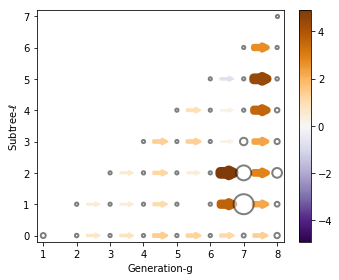

In [20]:
mvn.specgraph(data='Q_Linv')

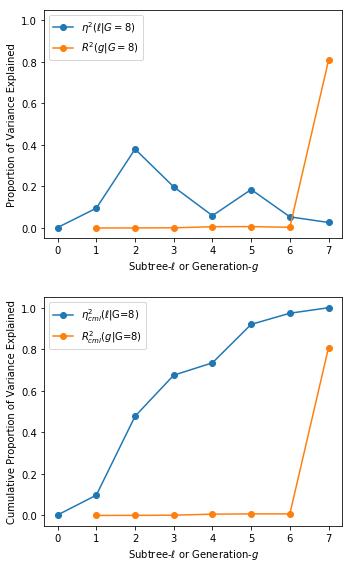

In [21]:
mvn.explvariance(output=None)